# Data Preparation

In [1]:
# import necessary libraries
import pandas as pd

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge the datasets on CustomerID
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

# Display the merged dataframe
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


# Feature Engineering

In [2]:
# Feature Engineering: Create features from transaction data
customer_features = merged_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    purchase_frequency=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Merge with customer profile information
customer_features = pd.merge(customer_features, customers_df, on='CustomerID', how='inner')

# Display the engineered features
print(customer_features.head())

  CustomerID  total_spent  purchase_frequency  avg_transaction_value  \
0      C0001      3354.52                   5                670.904   
1      C0002      1862.74                   4                465.685   
2      C0003      2725.38                   4                681.345   
3      C0004      5354.88                   8                669.360   
4      C0005      2034.24                   3                678.080   

         CustomerName         Region  SignupDate  
0    Lawrence Carroll  South America  2022-07-10  
1      Elizabeth Lutz           Asia  2022-02-13  
2      Michael Rivera  South America  2024-03-07  
3  Kathleen Rodriguez  South America  2022-10-09  
4         Laura Weber           Asia  2022-08-15  


# Clustering 

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = customer_features[['total_spent', 'purchase_frequency', 'avg_transaction_value']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

# Display the clusters
print(customer_features[['CustomerID', 'cluster']].head())

  CustomerID  cluster
0      C0001        3
1      C0002        1
2      C0003        3
3      C0004        0
4      C0005        3


# Visual representation of clusters.

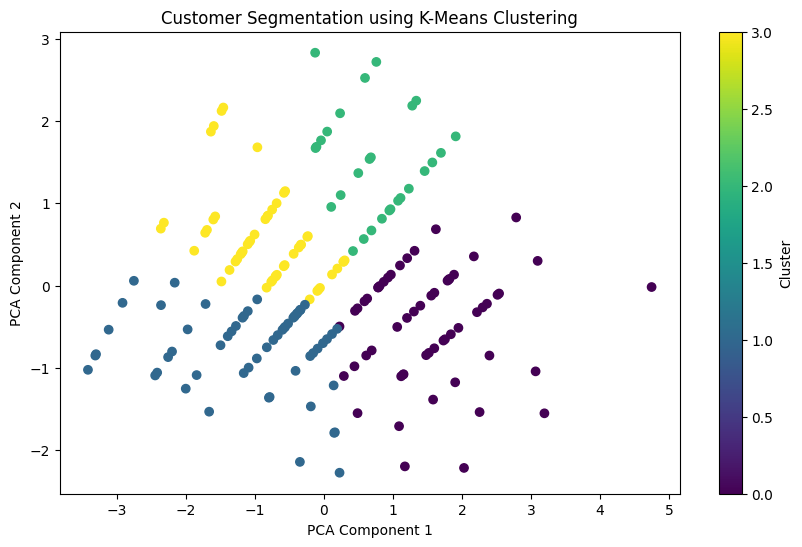

In [4]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=customer_features['cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()